In [4]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv('german-credit.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,0
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,4,53,male,2,free,little,little,4870,24,car,1


### Удаление атрибута

In [20]:
# удаляем ненужный столбец unnamed: 0
df.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


### Переименование атрибута

In [25]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'default'],
      dtype='object')

In [27]:
# переименовываем атрибуты: начало с маленькой буквы и вместо пробела нижнее подчеркивание
# str - чтобы обратиться имеено к строке с неймингом атрибутов
# replace, чтобы заменить пробелы на _ 
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [28]:
df.head()

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,default
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


### Проверка пропусков в данных

In [31]:
# выводим долю пропусков в столбцах
# получаем, что пропуски есть только в saving_accounts и checking_account
df.isna().mean()

age                 0.000
sex                 0.000
job                 0.000
housing             0.000
saving_accounts     0.183
checking_account    0.394
credit_amount       0.000
duration            0.000
purpose             0.000
default             0.000
dtype: float64

### Создание сводной таблицы

In [33]:
# группировка по атрибуты checking_account, количество и среднее считаем по атрибуту default
df.groupby('checking_account')['default'].agg(['count', 'mean'])

,count,mean
checking_account,,
little,274,0.492701
moderate,269,0.390335
rich,63,0.222222


In [34]:
df.pivot_table(index='checking_account',
               columns='sex',
               values=['default','credit_amount'],
               aggfunc=['count','mean'],
       margins=True)

count                                      mean  \
                 credit_amount           default           credit_amount   
sex                     female male  All  female male  All        female   
checking_account                                                           
little                      88  186  274      88  186  274   2564.215909   
moderate                    86  183  269      86  183  269   3720.034884   
rich                        20   43   63      20   43   63   1616.050000   
All                        194  412  606     194  412  606   2978.840206   

                                                                          
                                             default                      
sex                      male          All    female      male       All  
checking_account                                                          
little            3464.295699  3175.218978  0.522727  0.478495  0.492701  
moderate          3878.092896  3827.561338  0.476744  0.349727  0.390335  
rich              2438.860465  2177.650794  0.200000  0.232558  0.222222  
All               3541.070388  3361.082508  0.469072  0.395631  0.419142

<Axes: xlabel='checking_account'>

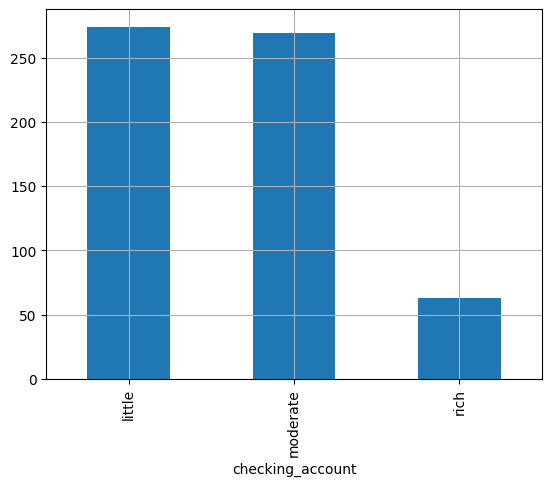

In [49]:
import matplotlib.pyplot as plt
import matplotlib
df.groupby('checking_account')['default'].count().plot(ylim=0, grid=True, kind='bar')